In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [21]:
start=dt.datetime(2017,1,3)
end=dt.datetime(2017,11,20)

prices=web.DataReader('AAPL','yahoo', start, end)['Close']
prices

Date
2017-01-03    116.150002
2017-01-04    116.019997
2017-01-05    116.610001
2017-01-06    117.910004
2017-01-09    118.989998
                 ...    
2017-11-14    171.339996
2017-11-15    169.080002
2017-11-16    171.100006
2017-11-17    170.149994
2017-11-20    169.979996
Name: Close, Length: 224, dtype: float64

In [22]:
returns=prices.pct_change()
returns

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009159
                ...   
2017-11-14   -0.015118
2017-11-15   -0.013190
2017-11-16    0.011947
2017-11-17   -0.005552
2017-11-20   -0.000999
Name: Close, Length: 224, dtype: float64

In [23]:
last_price=prices[-1]
last_price

169.97999572753906

In [24]:
# number of simulation
num_simulations=1000
num_days=252

In [25]:
simulation_df=pd.DataFrame()

In [26]:
for x in range(num_simulations):
    count=0
    daily_vol=returns.std()
    
    price_series=[]
    price=last_price*(1+np.random.normal(0,daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count==251:
            break
        price=price_series[count]*(1+np.random.normal(0,daily_vol))
        price_series.append(price)
        count+=1
    
    simulation_df[x]=price_series

In [29]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,169.277805,174.252559,171.394221,170.297416,169.045960,172.310153,170.466587,165.522716,169.989553,169.580765,...,168.600047,173.421330,170.069732,168.808675,170.411738,172.842155,170.475865,172.042219,168.131235,170.191665
1,169.647204,174.772547,173.210485,170.636308,170.072917,173.840610,171.305610,157.994002,175.006073,170.271548,...,167.787307,171.801103,168.884057,166.841062,173.860567,174.063140,170.350504,172.392007,166.745001,172.606327
2,165.120049,173.124468,173.174628,167.203833,170.986235,172.149695,172.479593,162.095430,174.641827,173.085793,...,169.466378,167.288384,167.103441,166.597080,176.626132,176.722921,169.333550,170.931949,166.935194,176.276851
3,167.931125,173.093343,173.216850,165.369280,171.437804,170.117198,172.102199,162.967819,171.048626,174.879656,...,169.307219,168.952455,164.502561,168.704351,177.706275,176.056267,169.680405,169.472611,167.412425,175.966811
4,166.846328,171.105929,171.971218,164.601924,172.433879,170.549754,173.340877,163.736730,170.768052,175.086241,...,166.626949,169.517357,164.788921,167.706928,177.624104,179.249296,167.395740,168.252630,165.138666,175.759016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,132.032168,215.205893,130.711960,157.303679,245.263779,134.391589,162.051357,169.037090,144.558063,218.659869,...,174.476155,199.775069,127.795075,160.864880,190.231517,247.488427,161.271103,196.913268,138.968341,170.163138
248,133.035424,219.041695,127.142631,157.841821,247.112307,134.666127,162.832577,167.855087,146.640644,221.389285,...,175.646318,201.157288,126.459053,158.565374,188.258014,251.318282,160.354872,193.691940,139.296411,166.959390
249,134.057741,220.029554,127.004117,158.972664,241.621324,131.470425,166.086763,169.596506,145.511541,222.815357,...,174.140389,203.721394,127.321751,160.072974,188.601813,250.409990,160.672007,196.055901,139.796997,166.765341
250,133.019892,218.999764,128.146658,158.085255,243.320969,128.469328,165.824174,171.711731,142.669467,222.749053,...,175.621902,202.752660,129.307749,162.379181,188.526588,252.562827,158.848255,193.245765,139.810659,164.948543


In [31]:
simulation_last_day=simulation_df.iloc[251,:]
simulation_last_day

0      131.415440
1      220.271039
2      125.480222
3      156.992186
4      244.793418
          ...    
995    249.625492
996    157.946169
997    191.255265
998    137.881362
999    166.946058
Name: 251, Length: 1000, dtype: float64

In [32]:
simulation_last_day.mean()

168.902674911318

In [33]:
simulation_last_day.describe()

count    1000.000000
mean      168.902675
std        30.476197
min        93.662403
25%       146.987989
50%       165.944551
75%       189.077453
max       289.806059
Name: 251, dtype: float64

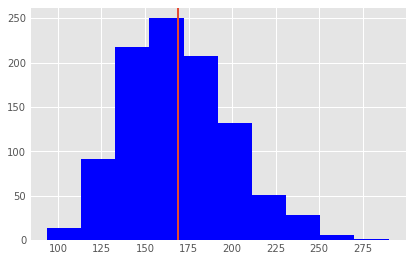

In [40]:
plt.hist(simulation_last_day, bins=10, color='b')
plt.axvline(x=simulation_last_day.mean(),linewidth=2)
plt.show()

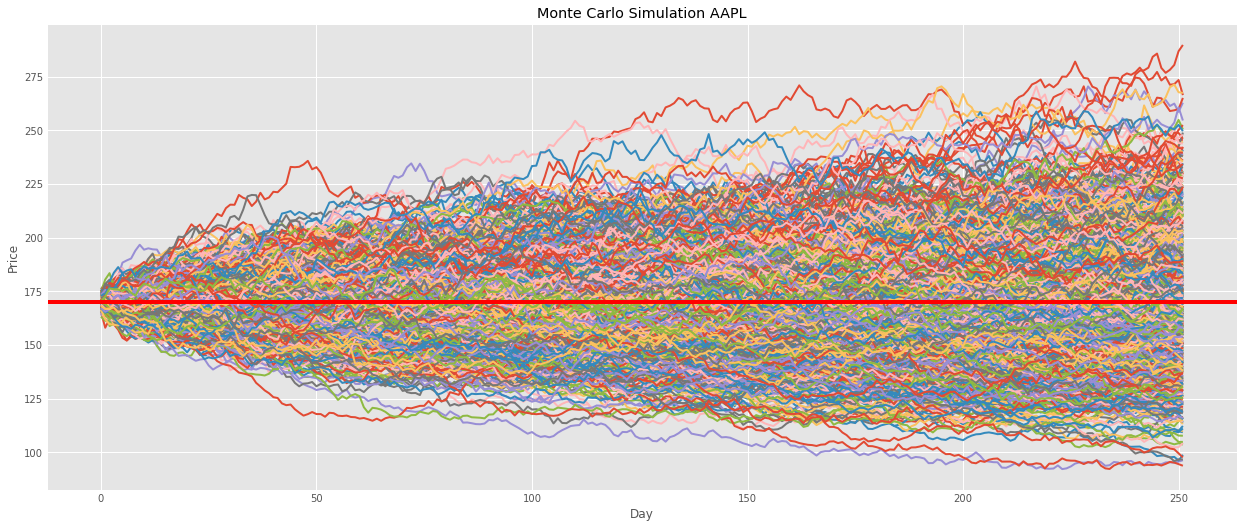

In [36]:
fig=plt.figure(figsize=(19,8))
plt.plot(simulation_df, linewidth=2)
plt.title('Monte Carlo Simulation AAPL')
plt.xlabel('Day')
plt.ylabel('Price')
plt.axhline(y=last_price, color='r', linestyle='-')
plt.show()